In [1]:
# Importing Required Libraries 

# Dataframe Manipulation
import pandas as pd 
import numpy as np 

# Data Visualization
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sn 

# Exploratory Data Analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller

# Modelling 
import tensorflow as tf
import pmdarima as pm

# Dealing with warnings 
import warnings
warnings.filterwarnings(action="ignore")

In [2]:
# Importing Data 
nifty_all = pd.read_csv(r"C:\Users\Sidhant Mathur\Desktop\Nifty_Data\NIFTY50_all.csv")

# Retrieving Wipro stock data from the entire Nifty dataset
nifty_wipro = nifty_all[nifty_all["Symbol"]=="WIPRO"].reset_index()
nifty_wipro.drop('index',inplace=True,axis=1)
nifty_wipro.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,WIPRO,EQ,2522.40,2724.00,2724.20,2724.00,2724.20,2724.20,2724.17,1599,4.355942e+11,NaN,NaN,NaN
1,2000-01-04,WIPRO,EQ,2724.20,2942.15,2942.15,2942.15,2942.15,2942.15,2942.15,4392,1.292192e+12,NaN,NaN,NaN
2,2000-01-05,WIPRO,EQ,2942.15,2942.15,3177.55,2715.00,3000.00,2990.10,3063.86,132297,4.053390e+13,NaN,NaN,NaN
3,2000-01-06,WIPRO,EQ,2990.10,3144.70,3183.00,2790.00,2915.00,2932.25,2962.41,72840,2.157822e+13,NaN,NaN,NaN
4,2000-01-07,WIPRO,EQ,2932.25,2751.00,2751.00,2697.70,2697.70,2697.70,2697.95,10110,2.727630e+12,NaN,NaN,NaN


# Exploratory Data Analysis

1. Plotting various attributes of the data. Highlighting the relationships between various attributes & correlating them with the visualizations.
2. Checking for Stationarity of all Time Series (perform AdFuller Test)
3. Rolling Window Relation, Differenced Relation plotting ect. & plotting Autocorrelation & Partial Autocorrelation Plots 
4. Seasonal Decomposition of each Time Series 
5. Fourier Analysis for Seasonality & Detrending
6. Analysis of Random Walks & White Noise


Terms to remember:
* Linear vs Non Linear Time Series 
* Deterministic & Non-Deterministic Trend 
* Unequal Distribution of Variance 
* Random Walk 
* 


Things to try:
1. Inflation Correction


In [3]:
# Creating a view depicting basic information about the data 
nifty_wipro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5306 non-null   object 
 1   Symbol              5306 non-null   object 
 2   Series              5306 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                5306 non-null   float64
 5   High                5306 non-null   float64
 6   Low                 5306 non-null   float64
 7   Last                5306 non-null   float64
 8   Close               5306 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              5306 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4797 non-null   float64
 14  %Deliverble         4797 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.9

In [4]:
# Reviewing basic central tendency measures 
nifty_wipro.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03,5.306000e+03,2456.000000,4.797000e+03,4797.000000
mean,754.857303,756.799981,772.478364,738.150886,754.522418,754.474783,755.165515,2.236123e+06,1.024537e+14,48112.935668,9.957321e+05,0.459096
std,794.521897,803.371567,825.259513,768.613272,794.383479,794.159260,795.825682,4.827183e+06,1.741585e+14,46662.502048,1.324731e+06,0.185192
min,162.350000,163.100000,171.350000,159.400000,161.800000,162.350000,166.440000,1.003000e+03,4.355942e+11,692.000000,8.242000e+03,0.036400
25%,380.525000,380.575000,386.900000,374.475000,380.612500,380.525000,380.480000,6.937025e+05,4.319006e+13,25021.000000,3.023500e+05,0.332100
50%,503.400000,504.000000,510.800000,494.500000,503.800000,503.250000,503.450000,1.152270e+06,6.579357e+13,36659.500000,6.432110e+05,0.483000
75%,679.225000,680.000000,690.887500,670.812500,679.925000,678.687500,680.795000,2.004576e+06,1.075259e+14,55772.750000,1.197829e+06,0.596700
max,9587.450000,10350.000000,10350.000000,8928.350000,9640.000000,9587.450000,9607.140000,1.303677e+08,5.075003e+15,793471.000000,3.554140e+07,0.939400


1. Rescaling of Time Series will be required 
2. All Time Series have increasing amounts of variance over time (shown by the relationship between the 1st , 2nd and 3rd Quantile measures)

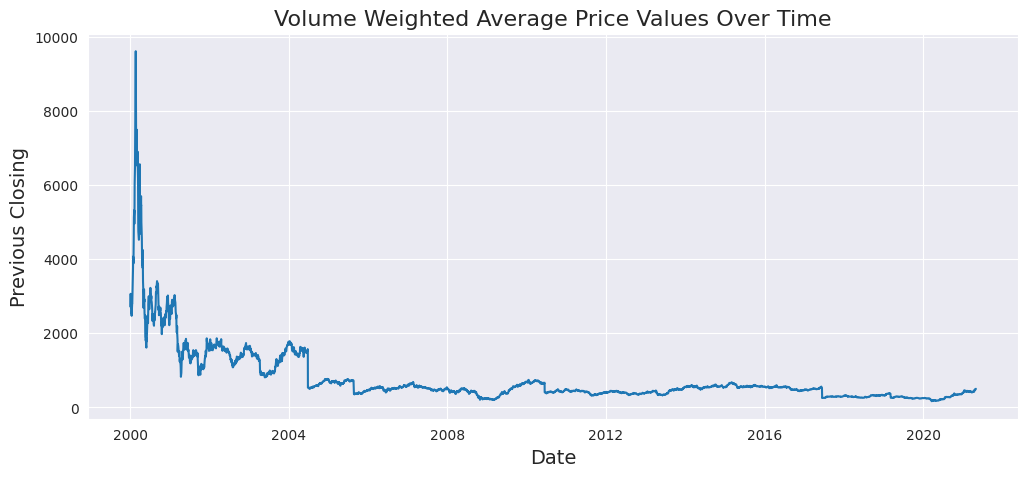

In [5]:
# Let's try visualizing the predicting time series

# Volume Weighted Average Price
with sn.axes_style("darkgrid"):
    fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(12,5))
    ax = sn.lineplot(data = nifty_wipro, y = "VWAP" , x = pd.to_datetime(nifty_wipro["Date"]))
    ax.set_title('Volume Weighted Average Price Values Over Time',fontsize=16)
    ax.set_xlabel('Date',fontsize=14)
    ax.set_ylabel('Previous Closing',fontsize=14)

The stock price of wipro has dramatically fallen each year significantly. Let's chalk up a few plots to dive deeper into this time series.

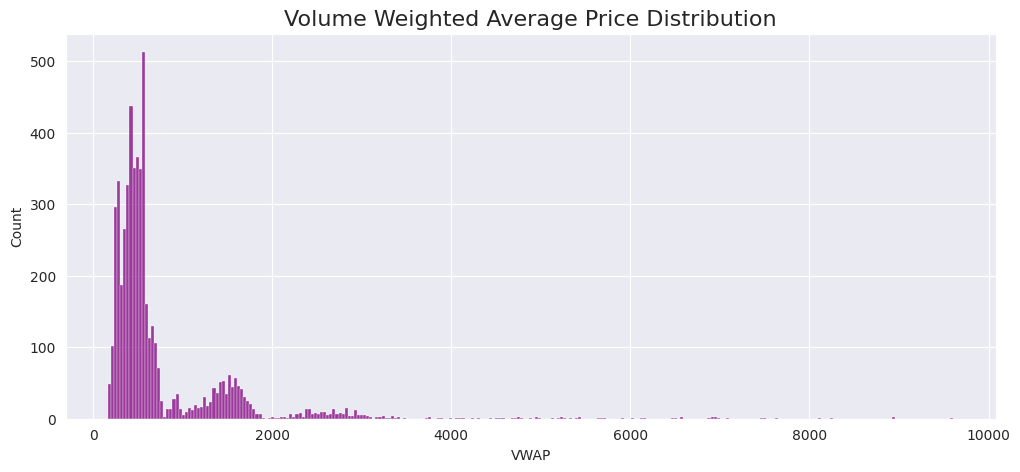

In [6]:
with sn.axes_style("darkgrid"):
    
    # Subplot for checking Normality 
    fig,ax0 = plt.subplots(nrows=1,ncols=1,figsize=(12,5))
    ax0 = sn.histplot(nifty_wipro["VWAP"],ax = ax0,color='purple')
    ax0.set_title('Volume Weighted Average Price Distribution',fontsize=16)
    ax.set_xlabel('Price',fontsize=14)

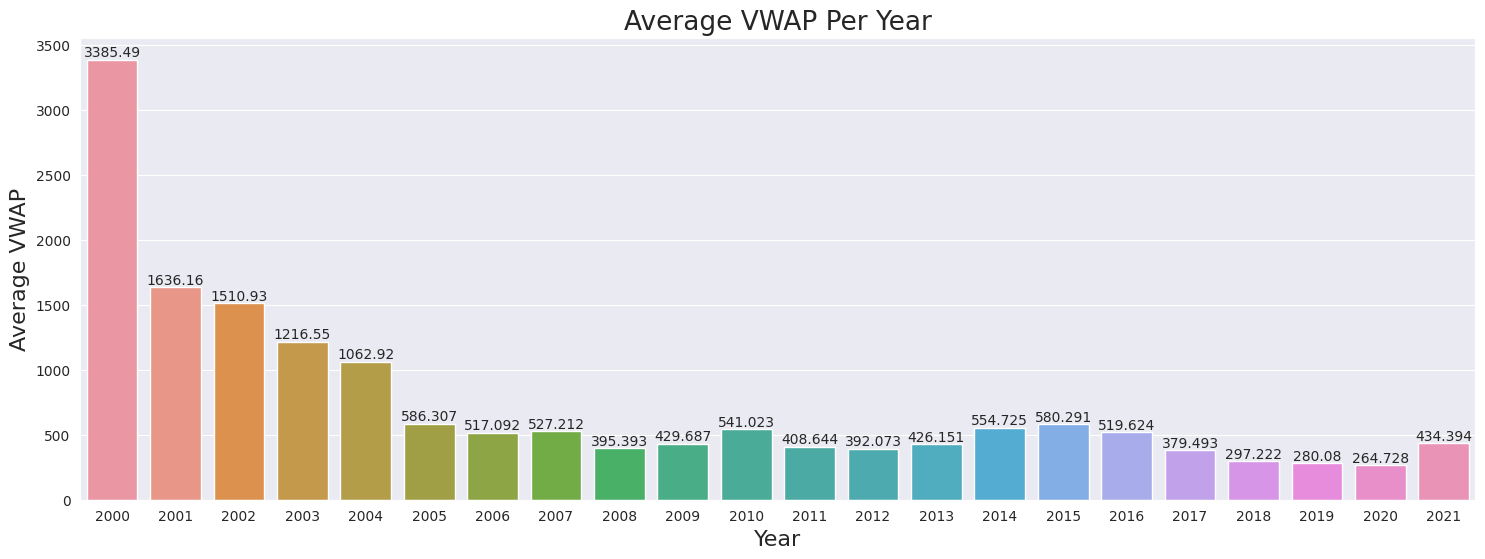

In [7]:
# Average Volume Weighted Average Price between 2000-2021

slice_vwap = nifty_wipro[['VWAP']]
slice_vwap["year"] = nifty_wipro['Date'].map(lambda x: pd.to_datetime(x).year)
date_list = list(set(slice_vwap["year"]))
year_wise_average_vwap = pd.DataFrame(slice_vwap.groupby('year')['VWAP'].mean()).reset_index()[["VWAP"]]
vwap_list = year_wise_average_vwap["VWAP"].values.tolist()

# Visualizing the results 
with sn.axes_style("darkgrid"):
    fig, ax = plt.subplots(figsize=(18,6))
    ax= sn.barplot(x=date_list,y = vwap_list)
    for i in ax.containers:
        ax.bar_label(i,)
    ax.set_title('Average VWAP Per Year',fontsize=19)
    ax.set_xlabel('Year',fontsize=16)
    ax.set_ylabel('Average VWAP',fontsize=16)

Let's create a function to visualize the Volume Weighted Average Prices by years in order to gain more insights about the presence of outliers, distribution of VWAP values, skewness ect.

In [88]:
# Average Volume Weighted Average Price over time
def visualize_by_year(year):
    """
    Function capable of creating a box plot for each month of the specified year.
    Useful for checking the presence of outliers in each month
    """
    # Create new dataframe to store required columns
    slice_vwap = nifty_wipro[['VWAP']]
    slice_vwap["Date"] = nifty_wipro['Date'].map(lambda x: str(x))
    
    # Creating start and end dates for date wise filtering
    start_date = year+"-01-01"
    end_date = year+"-12-31"
    req_df = slice_vwap[(slice_vwap['Date'] >= start_date) & (slice_vwap['Date'] <= end_date)].reset_index(drop=True)
    req_df['Month'] = req_df["Date"].map(lambda x: int(x.split('-')[1]))
    
    # Creating and mapping the integer values with respective month index
    month_dict = {1: 'January', 2: 'February', 3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',
                  9:'September',10:'October',11:'November',12:'December'}
    req_df['Month'] = req_df['Month'].map(month_dict)
    
    # Visualize results
    with sn.axes_style("darkgrid"):
        fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(14,5))
        ax=sn.boxplot(x="Month",y="VWAP",data = req_df)
        ax.set_title(f'Month Wise Volume Weight Average Price in {year}',fontsize=16)
        ax.set_xlabel('Month',fontsize=14)
        ax.set_ylabel('VWAP',fontsize=14)

Let's look at the year 2000 since it contains the highest average volume weighted price of all years

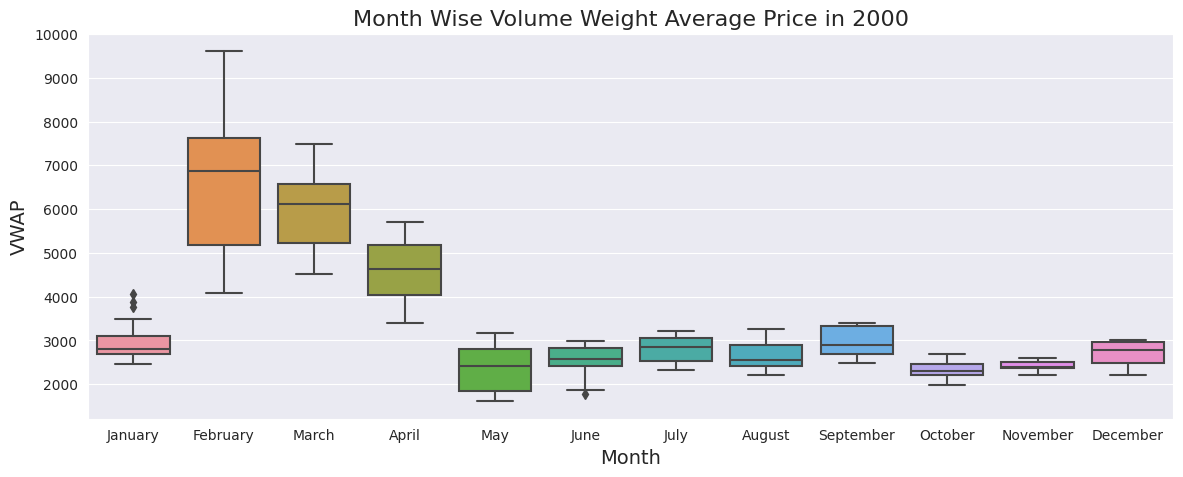

In [89]:
visualize_by_year('2000')

Now this plot has generated some noteworthy insights:

* For 2000, the month of February has played the most significant contribution towards surging the Average VWAP followed by March, April and May. This is attributed to the relatively high range and variance of VWAP values in the aforementioned months.


* The Month-Wise VWAP Distribution does not contain any outliers, except in the case of January. We can deal with these outliers in the upcoming preprocessing stages.

Let's plot a few more years to uncover any other useful patterns over the years

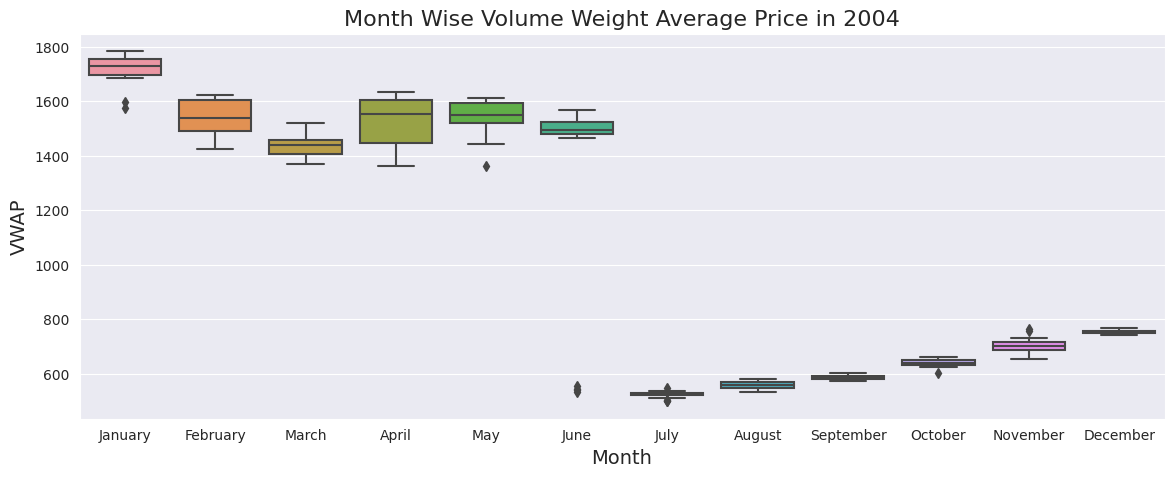

In [92]:
visualize_by_year('2004')

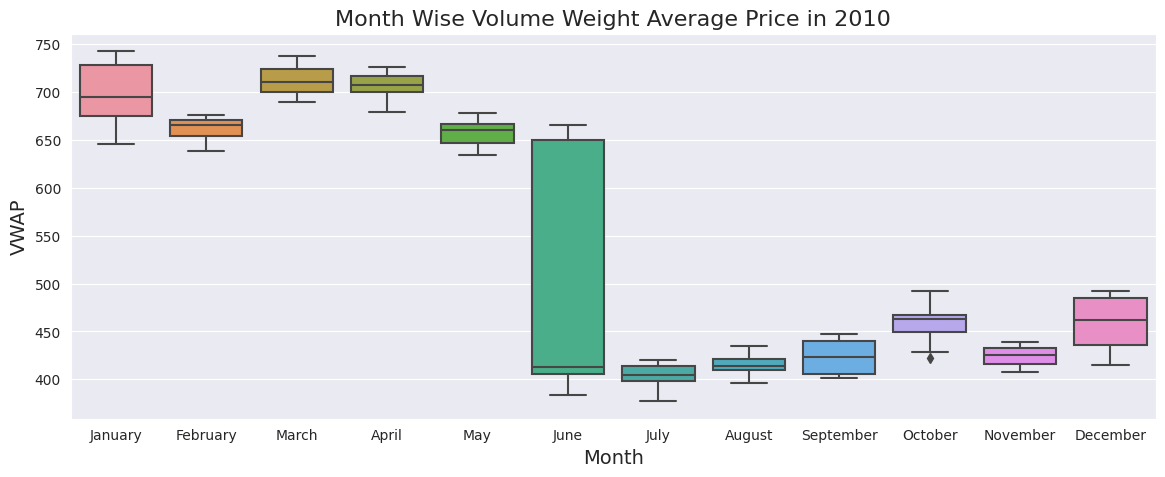

In [94]:
visualize_by_year('2010')

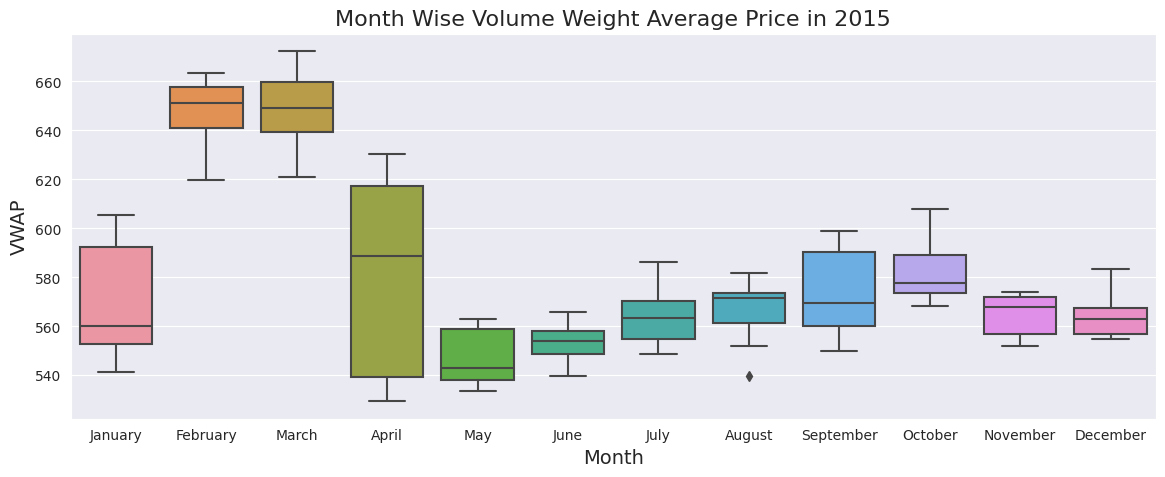

In [95]:
visualize_by_year('2015')

Let's break this time series down into its salient components in order to understand it better. 

## Seasonal Decomposition


All time series can be decomposed into various components like:-
* Level
* Seasonal Variations
* Trends 
* Noise. 

These 4 parts can combine either additively or multiplicatively into the time series
We can use `seasonal_decompose` of the statsmodals library to perform decomposition:-

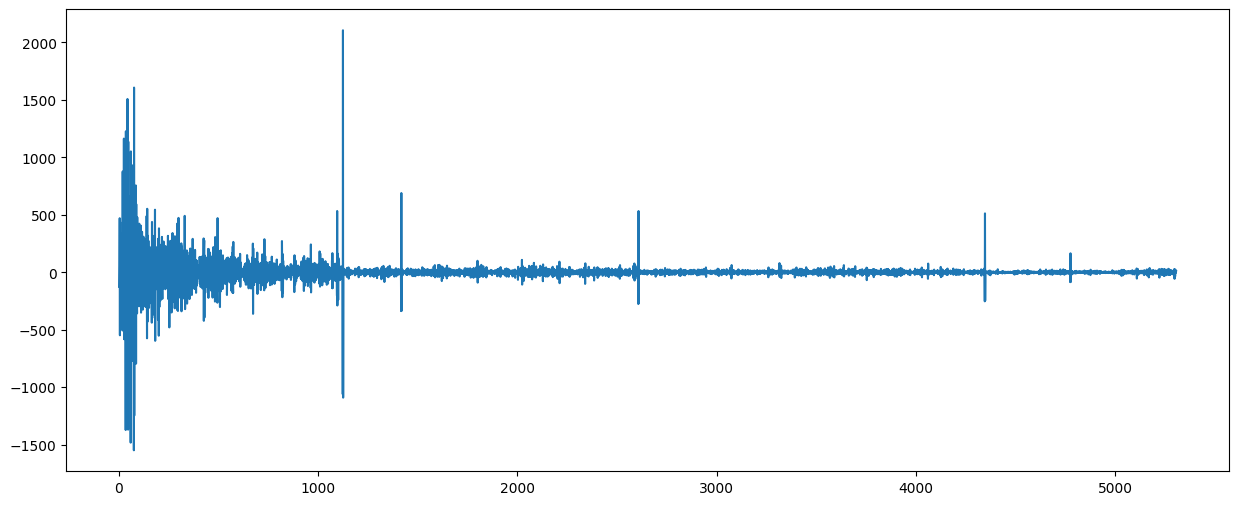

In [166]:
nifty_wipro["VWAP"].diff().diff().diff().plot(figsize=(15,6));

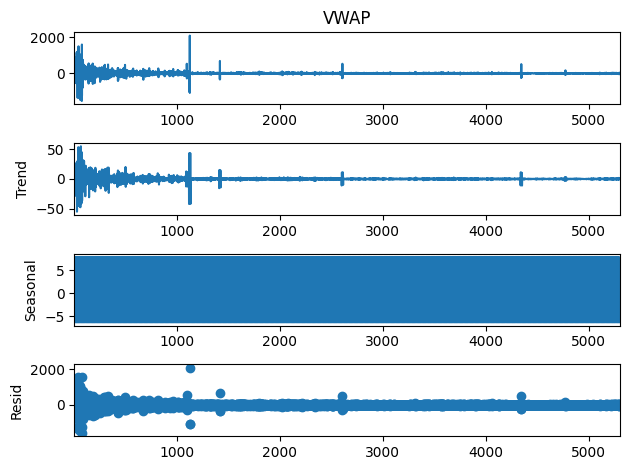

In [167]:
decompose_data = seasonal_decompose(nifty_wipro["VWAP"].diff().diff().diff().dropna(), model='additive',period=12, extrapolate_trend = 12)
decompose_data.plot();

In [159]:
decompose_data.trend

2       32.967770
3       31.413049
4       29.858329
5       28.303608
6       26.748887
          ...    
5301    -0.359620
5302    -0.412491
5303    -0.465362
5304    -0.518233
5305    -0.571103
Name: trend, Length: 5304, dtype: float64

Nowadays, most Time Series Algorithms assume that the series will be stationary. A time series is stationarity if it has constant mean and variance over time. Most models work only with stationary data as this makes it easier to model. Often, stock prices are not a stationary process, since we might see a growing trend, or its volatility might increase over time (meaning that variance is changing).

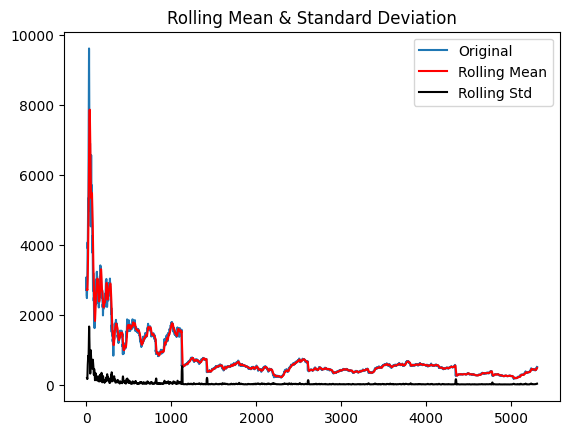

In [168]:
# Talking about mean and variance be constant over time, let's plot them and check
# Determing rolling statistics
rolmean = nifty_wipro["VWAP"].rolling(window=12).mean(center=False)
rolstd = nifty_wipro["VWAP"].rolling(window=12).std(center=False)

# Plot rolling statistics:
orig = plt.plot(nifty_wipro["VWAP"], label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

From the plot, it seems the time series has a constant mean and variance over time. However, let's apply the Augmented-Dickey FUller test, to determine if the time series is stationary(constant mean and variance) or not.

### Stationarity Tests

The Augmented Dickey-Fuller test is a type of statistical test called a unit root test. The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend. There are a number of unit root tests and the Augmented Dickey-Fuller may be one of the more widely used. It uses an autoregressive model and optimizes an information criterion across multiple different lag values.

In [144]:
def adfuller_test(time_series):
    # Function used to perform the "Augmented Dickey-Fuller" test on the time series.
    # This Test is used to find the unit root in the series, which is directly linked with the time series show stationarity
    result = adfuller(time_series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

In [148]:
adfuller_test(nifty_wipro["VWAP"])

ADF Statistic: -9.623160
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


From the preceeding test, the resulting p-value is less that 0.05. Therefore, we can reject the null hypothesis (H0), and conclude that the data does not have a unit root and is stationary

### Plotting AutoCorrelation and Partial AutoCorrelation Plots

Autocorelation plots show how correlated are values at time t with the next values in time t+1,t+2,..t+n. If the data would be non-stationary the autocorrelation values will be highly correlated with distant points in time showing possible seasonalities or trends. This is an alternate to check for stationarity in the data and will come handy in determining the order p & q when using the ARIMA algorithm

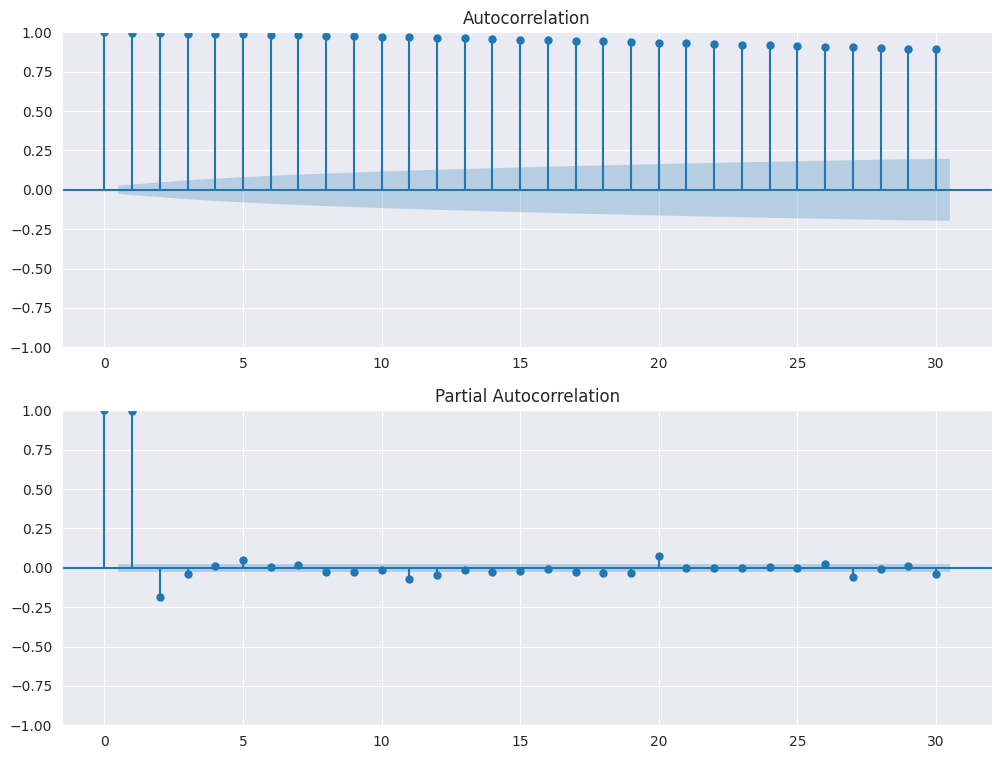

In [165]:
with sn.axes_style("darkgrid"):
    fig , (ax0,ax1) = plt.subplots(nrows=2,ncols=1, figsize=(12,9))
    ax0 = plot_acf(np.sqrt(nifty_wipro["VWAP"]), lags=30,ax=ax0)
    ax1 = plot_pacf(np.sqrt(nifty_wipro["VWAP"]), lags=30,ax=ax1)

In [ ]:
# Data is not stationary 

In [ ]:
# Difference in time step values
# Plot 10 year moving average and 20 year moving average
# Checking Stationarity 
# Fourier Analysis 
# Decomopsition
# Analysis of Residuals & White Noise

In [ ]:
# Important Dates:
# 1. Finish Exploratory Data Analysis by Saturday (3rd December)

https://www.google.com/search?q=nifty50+crash+in+india&rlz=1C1RXQR_enIN963IN963&oq=Nifty50+crash+in+&aqs=chrome.1.69i57j33i10i160.9266j0j1&sourceid=chrome&ie=UTF-8

https://en.wikipedia.org/wiki/Stock_market_crashes_in_India#:~:text=As%20per%20the%20latter%20definition,January%2C%20May%20and%20June%202008.

https://m.economictimes.com/markets/stocks/news/credit-rating-agencies-sebi-extends-deadline-for-standardised-framework-implementation/articleshow/95917092.cms

https://www.google.com/search?q=dotcom+boom&rlz=1C1RXQR_enIN963IN963&sourceid=chrome&ie=UTF-8

https://corporatefinanceinstitute.com/resources/equities/dotcom-bubble/

https://www.google.com/search?q=nifty50+indicates+which+sector&rlz=1C1RXQR_enIN963IN963&oq=nifty50+indicates&aqs=chrome.2.69i57j33i10i160l2.12768j1j1&sourceid=chrome&ie=UTF-8

https://www.influxdata.com/what-is-time-series-data/

https://www.newyorkfed.org/medialibrary/media/research/staff_reports/sr87.pdf

https://rpubs.com/shekharhazari/756356

https://www.google.com/search?q=trend+stationarity+in+time+series&rlz=1C1RXQR_enIN963IN963&sxsrf=ALiCzsZSFjFsmxWcPynjUyxt1HeIwla_9A%3A1669913740624&ei=jNyIY9DZJaPgseMPkeG2kAc&ved=0ahUKEwjQz8K68dj7AhUjcGwGHZGwDXIQ4dUDCBA&uact=5&oq=trend+stationarity+in+time+series&gs_lcp=Cgxnd3Mtd2l6LXNlcnAQAzIGCAAQFhAeMgYIABAWEB4yCggAEBYQHhAPEAoyBQgAEIYDMgUIABCGAzIFCAAQhgMyBQgAEIYDMgUIABCGAzoECCMQJzoFCAAQkQI6CwgAEIAEELEDEIMBOgUIABCABDoRCC4QgAQQsQMQgwEQxwEQ0QM6BQguEIAEOgQIABBDOgcILhDUAhBDOgoIABCxAxCDARBDOgcIABCxAxBDOgoILhDHARDRAxBDOggIABCABBCxAzoTCC4QsQMQgwEQxwEQ0QMQ1AIQQzoLCAAQgAQQsQMQyQM6GQguEIAEEIcCELEDEIMBEMcBENEDENQCEBQ6EAgAEIAEEIcCELEDEIMBEBQ6CggAEIAEEMkDEAo6DQgAEIAEELEDEIMBEAo6BwgAEIAEEAo6CggAEIAEEIcCEBQ6CAgAEBYQHhAKOggIABAWEB4QDzoHCCEQoAEQCjoICCEQFhAeEB1KBAhBGABKBAhGGABQAFiTRmDwRmgAcAF4AIABwgGIAeQlkgEEMC4zMpgBAKABAcABAQ&sclient=gws-wiz-serp

https://h2o.ai/blog/time-series-forecasting-best-practices/

https://blog.paperspace.com/introduction-time-series-analysis/

https://www.google.com/search?q=conditions+for+trend+data+in+autocorrelation&rlz=1C1RXQR_enIN963IN963&oq=conditions+for+trend+data&aqs=chrome.1.69i57j33i160l2.9586j0j9&sourceid=chrome&ie=UTF-8

https://towardsdatascience.com/things-that-you-should-check-before-creating-univariate-time-series-model-ba5fe381f68e

https://rpubs.com/shekharhazari/756356

The law of large numbers states that the observed random mean from an increasingly large number of observations of a random variable will always approach the distribution mean . That is, as the number of observations increases, the mean of these observations will become closer and closer to the true mean of the random variable. This does not imply, however, that short term averages will reflect the mean.

In [ ]:
# Variance Analysis 
